In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Fitting 15 folds for each of 25 candidates, totalling 375 fits


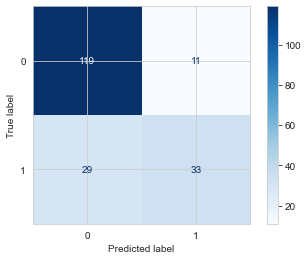

In [29]:
# Make SVM Model

X, y = df.drop(columns='Outcome'), df['Outcome']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 0)
df.dtypes
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
model = svm.SVC(kernel='rbf').fit(X_train, y_train)
y_prediction = model.predict(X_test)
sns.set_style('whitegrid')

x_ = y_test
y_ = y_prediction

confusion_matrix(y_test,y_prediction)
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)
